In [0]:
import pylab
import numpy as np
import matplotlib.pyplot as plt

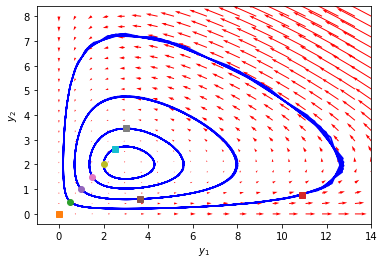

In [21]:
def f(Y, t):  # campo de la ecuación de Lotka-Volterra
    y1, y2 = Y
    a = 1 
    b = 0.75
    c = 0.5
    d = 0.25
    y1p = a*y1 - c*y1*y2
    y2p = -b*y2 + d*y1*y2
    return [y1p, y2p]

# límites del plano de fase a mostrar  
x_min = 0
x_max = 14
y_min = 0
y_max = 8

# generación de la grilla

y1 = np.linspace(x_min, x_max, 20)
y2 = np.linspace(y_min, y_max, 20)
Y1, Y2 = np.meshgrid(y1, y2)

# generación del quiver
t = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

Q = plt.quiver(Y1, Y2, u, v, color='r')

# ploteo de una serie de trayectorias
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
#plt.savefig('images/phase-portrait.png')

from scipy.integrate import odeint  # para simular

for y_0 in [0, 0.5, 1, 1.5, 2]:
    tspan = np.linspace(0, 50, 200)
    y0 = [y_0, y_0]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path en azul
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start círculo de color que muestra dónde arranca
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end cuadrado de color que muestra dónde finaliza la simulación
    
plt.xlim([-1, x_max])
#plt.savefig('images/phase-portrait-2.png')
plt.show()

